In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sympy import *
import lmfit



In [37]:
def ratelessthan1(row):
        if row['rate'] < 1:
            return False
        else:
            return True

In [39]:
class DecayingSineModel(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel, self).__init__(decaying_sine, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params(b= 1.22, d= 3.33)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [47]:
def getModel(year):
    df = pd.read_csv(year)
    df["New"]= int('0')
    df.sort_values(by = ['rate'], ascending= [True])
    for county in df:
        df["New"] =  abs(df.index - 58)+1
    df2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
    print(df2)
    model = DecayingSineModel()
    params = model.guess(df2['ccount'], x=df2['rate'])
    fit = model.fit(df2['ccount'], params, x=df2['rate'])
    return fit


In [48]:
f= getModel('Counties2020.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.083333
2    2.0  0.083333
3    3.0  0.083333
4    4.0  0.133333
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: Futu

In [58]:
f.params["b"].value
f.params["d"].value

2.523098271957213

In [82]:
files = ['CrudeCounty2021.csv','Counties2020.csv','Counties2019.csv','Counties2018.csv','Counties2017.csv','Counties2016.csv','Counties2015.csv','Counties2014.csv','Counties2013.csv','Counties2012.csv','Counties2011.csv','Counties2010.csv','Counties2009.csv','Counties2008.csv','Counties2007.csv','Counties2006.csv']
bval = []
dval = []
for file in files:
    f = getModel(file)
    bval.append(f.params["b"].value)
    dval.append(f.params["d"].value)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: Futu

    rate    ccount
0    0.0  0.000000
1    1.0  0.050000
2    2.0  0.050000
3    3.0  0.066667
4    4.0  0.066667
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.083333
2    2.0  0.083333
3    3.0  0.083333
4    4.0  0.133333
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.066667
2    2.0  0.100000
3    3.0  0.133333
4    4.0  0.200000
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.116667
2    2.0  0.166667
3    3.0  0.233333
4    4.0  0.400000
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 c

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: Futu

    rate    ccount
0    0.0  0.000000
1    1.0  0.083333
2    2.0  0.100000
3    3.0  0.183333
4    4.0  0.316667
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.083333
2    2.0  0.100000
3    3.0  0.216667
4    4.0  0.350000
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.133333
2    2.0  0.150000
3    3.0  0.316667
4    4.0  0.416667
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.100000
2    2.0  0.150000
3    3.0  0.283333
4    4.0  0.400000
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 c

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_44317/719739201.py:9: Futu

In [83]:
bval

[2.668027184226109,
 2.523098271957213,
 2.3855862197485305,
 2.0711037640849836,
 2.0262620606725052,
 2.1377069453139512,
 2.046620513671618,
 2.030680596315584,
 2.0390331605016474,
 1.7805834613709783,
 1.9058603248372155,
 1.6799767549500613,
 2.145475293203823,
 2.1837400795580266,
 1.94360704601068,
 1.7530456879766754]

In [84]:
dval

[1563.6311273169404,
 350.9869779372549,
 112.15929749868529,
 26.920981773670377,
 27.944027112325355,
 44.58158291782738,
 36.84071609565301,
 35.14612613719641,
 35.53748990350887,
 15.146352167542657,
 22.175011246432838,
 21.41972932200638,
 50.25618732044222,
 39.742839988182276,
 27.408408807026827,
 12.061689175298953]

In [76]:
df2
for val in bval:
    b = bval[int(val)]
    d = dval[int(val)]
    q = pow(x,b)
    d*b*pow(x,b-1)/(pow((q+d),2))
    

NameError: name 'x' is not defined

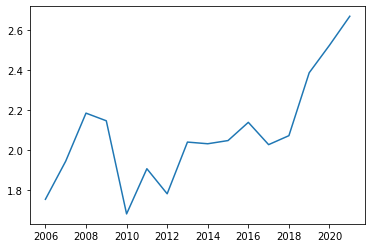

In [89]:
x = [2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
y = bval
plt.plot(x,y )

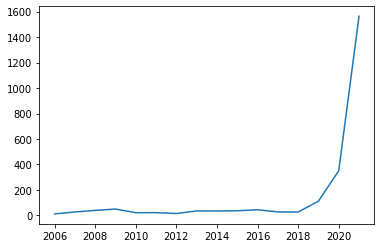

In [88]:
x = [2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
y = dval
plt.plot(x,y )

In [95]:
def prime3(x,b,d):
    q = pow(x,b)
    return (d*b*pow(x,b-1))/(pow((q+d),2))

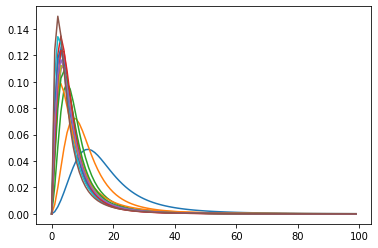

In [99]:
for m in range(len(bval)):
    x = []
    y= []
    b = bval[m]
    d = dval[m]
    for i in range(100):
        x.append(i)
        y.append(prime3(x[i],b,d))
    plt.plot(x,y)

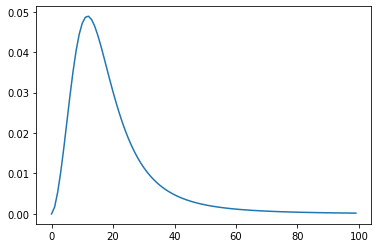

In [97]:
plt.plot(x,y)

In [ ]:
3#